In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import os
import glob
from tensorflow import keras

In [2]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'stones_png')
label_names = os.listdir(dataset_path)

images = []
labels = []

for label in label_names:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        for image_file in image_files:
            image_path = os.path.join(label_path,image_file)
            images.append(image_path)
            labels.append(label)



In [57]:
# Dataset_JPG 가공
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# dataset_path = os.path.join(os.getcwd(), 'dataset', 'stones_png')
dataset_path = os.path.join(os.getcwd(), 'Dataset_JPG', 'All')
label_names = os.listdir(dataset_path)

processed_images = []
processed_labels = []

targetX = 128
targetY = 128
target_size = (targetX, targetY)  # 목표 크기

for label in label_names:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        for image_file in image_files:
            image_path = os.path.join(label_path, image_file)
            try:
                img = Image.open(image_path)
                # 이미지 크기 조정 및 채널 변환
                img = img.resize(target_size).convert('RGB')
                # 이미지를 NumPy 배열로 변환하고 정규화
                img_array = np.array(img) / 255.0
                # 이미지 데이터와 라벨을 리스트에 추가
                processed_images.append(img_array)
                processed_labels.append(label)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# NumPy 배열로 변환
processed_images = np.array(processed_images)
processed_labels = np.array(processed_labels)

# 라벨을 숫자로 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(processed_labels)

# 라벨을 원-핫 인코딩
one_hot_labels = to_categorical(encoded_labels)

독립 = processed_images
종속 = one_hot_labels

독립r = processed_images.reshape(len(processed_images), targetX, targetY, 3)

Error processing /Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/Dataset_JPG/All/Basalt/.DS_Store: cannot identify image file '/Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/Dataset_JPG/All/Basalt/.DS_Store'
Error processing /Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/Dataset_JPG/All/Granite/.DS_Store: cannot identify image file '/Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/Dataset_JPG/All/Granite/.DS_Store'


In [58]:
# dataset stones_png 가공
dataset_path = os.path.join(os.getcwd(), 'dataset', 'stones_png')
label_names = os.listdir(dataset_path)

processed_images = []
processed_labels = []

target_size = (targetX, targetY)  # 목표 크기

for label in label_names:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        image_files = os.listdir(label_path)
        for image_file in image_files:
            image_path = os.path.join(label_path, image_file)
            try:
                img = Image.open(image_path)
                # 이미지 크기 조정 및 채널 변환
                img = img.resize(target_size).convert('RGB')
                # 이미지를 NumPy 배열로 변환하고 정규화
                img_array = np.array(img) / 255.0
                # 이미지 데이터와 라벨을 리스트에 추가
                processed_images.append(img_array)
                processed_labels.append(label)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# NumPy 배열로 변환
processed_images = np.array(processed_images)
processed_labels = np.array(processed_labels)

# 라벨을 숫자로 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(processed_labels)

# 라벨을 원-핫 인코딩
one_hot_labels = to_categorical(encoded_labels)

Sample = processed_images
SampleOutput = one_hot_labels

SampleR = processed_images.reshape(len(processed_images), targetX, targetY, 3)

Error processing /Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Granite/.DS_Store: cannot identify image file '/Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Granite/.DS_Store'
Error processing /Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Quartzite/.DS_Store: cannot identify image file '/Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Quartzite/.DS_Store'
Error processing /Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Sandstone/.DS_Store: cannot identify image file '/Users/ddoram/Documents/GitHub/EarthScience/EartthSciencePresentation/dataset/stones_png/Sandstone/.DS_Store'


In [65]:
import tensorflow as tf
#모델 만들기
X = tf.keras.layers.Input(shape=[targetX, targetY, 3], name='input_layer')
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish') (X)
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish') (H)
H = tf.keras.layers.Flatten() (H)
H = tf.keras.layers.Dense(84, activation='swish') (H)
Y = tf.keras.layers.Dense(6, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (10,10), activation='relu', input_shape=(targetX, targetY, 3)))
# model.add(tf.keras.layers.MaxPooling2D((5,5)))
# model.add(tf.keras.layers.Conv2D(64, (5,5), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((5,5)))
# model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(6))

# # model.add(tf.keras.layers.Dense())

In [66]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_71 (Conv2D)          (None, 124, 124, 3)       228       
                                                                 
 conv2d_72 (Conv2D)          (None, 120, 120, 6)       456       
                                                                 
 flatten_13 (Flatten)        (None, 86400)             0         
                                                                 
 dense_10 (Dense)            (None, 84)                7257684   
                                                                 
 dense_11 (Dense)            (None, 6)                 510       
                                                                 
Total params: 7258878 (27.69 MB)
Trainable params: 7258878 

In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__)
tf.config.list_physical_devices()


2.14.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [63]:
# # 모델 컴파일
# model.compile(loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [72]:
#모델 학습하기
history = model.fit(독립r, 종속, epochs=10, validation_data=(독립r, 종속))

#모델 구조 확인
# model.summary()
# plt.imshow(독립[0])

Epoch 1/10
52/52 [==============================] - 7s 141ms/step - loss: 0.0326 - accuracy: 0.9909 - val_loss: 0.0203 - val_accuracy: 0.9939
Epoch 2/10
52/52 [==============================] - 7s 129ms/step - loss: 0.0565 - accuracy: 0.9854 - val_loss: 0.0126 - val_accuracy: 0.9945
Epoch 3/10
52/52 [==============================] - 7s 128ms/step - loss: 0.0382 - accuracy: 0.9896 - val_loss: 0.0194 - val_accuracy: 0.9933
Epoch 4/10
52/52 [==============================] - 7s 127ms/step - loss: 0.0358 - accuracy: 0.9915 - val_loss: 0.0732 - val_accuracy: 0.9823
Epoch 5/10
52/52 [==============================] - 7s 128ms/step - loss: 0.0510 - accuracy: 0.9878 - val_loss: 0.0734 - val_accuracy: 0.9835
Epoch 6/10
52/52 [==============================] - 7s 130ms/step - loss: 0.0434 - accuracy: 0.9884 - val_loss: 0.0176 - val_accuracy: 0.9939
Epoch 7/10
52/52 [==============================] - 7s 128ms/step - loss: 0.0401 - accuracy: 0.9890 - val_loss: 0.0171 - val_accuracy: 0.9939
Epoch 

In [ ]:
# 모델 저장하기
model.save('rock classification')

In [ ]:

image_list = []
image_listR = []
gray_image_list = []
gray_image_listR = []
inverted_gray_image_list = []
inverted_gray_image_listR = []

def ImageSetting(file_name, number):
    # image_path = os.path.join(os.getcwd(), file_name)
    image_path = glob.glob('./stones_reform/*/*.png')
    image = Image.open(image_path)
    gray_image = image.convert('L')
    inverted_gray_image = ImageOps.invert(gray_image)
    image_array = np.array(image)
    gray_image_array = np.array(gray_image)
    inverted_gray_image_array = np.array(inverted_gray_image)
    image_arrayR = image_array.reshape(1, 784)
    gray_image_arrayR = image_array.reshape(1, 784)
    inverted_gray_image_arrayR = inverted_gray_image_array.reshape(1, 784)

    image_list.insert(number, image_array)
    image_listR.insert(number, image_arrayR)
    gray_image_list.insert(number, gray_image_array)
    gray_image_listR.insert(number, gray_image_arrayR)
    inverted_gray_image_list.insert(number, inverted_gray_image_array)
    inverted_gray_image_listR.insert(number, inverted_gray_image_arrayR)




In [ ]:
# 모델 불러오기
from tensorflow import keras
model = keras.models.load_model('rock classification')

In [70]:
#모델 이용
loss, accuracy = model.evaluate(SampleR, SampleOutput)

pred = model.predict(SampleR)
print("정확도: ", accuracy) #<--- 정확도 출력 방법 찾아보기
# pd.DataFrame(pred).round(2)
# plt.imshow(독립r[0])
#print("값은: ", 종속)

1/1 [==============================] - 0s 54ms/step
정확도:  0.1666666716337204


,0,1,2,3,4,5
0,0.01,0.0,0.93,0.03,0.03,0.00
1,0.02,0.0,0.98,0.00,0.00,0.00
2,0.00,0.0,0.95,0.05,0.00,0.00
3,0.09,0.0,0.89,0.00,0.02,0.00
4,0.00,0.0,1.00,0.00,0.00,0.00
5,0.03,0.0,0.00,0.02,0.94,0.00
6,0.02,0.0,0.02,0.94,0.00,0.02
7,0.00,0.0,0.17,0.47,0.33,0.03
8,0.02,0.0,0.38,0.07,0.53,0.00
9,0.01,0.0,0.03,0.01,0.96,0.00


1/1 - 0s - loss: 4.1663 - accuracy: 0.2778 - 28ms/epoch - 28ms/step


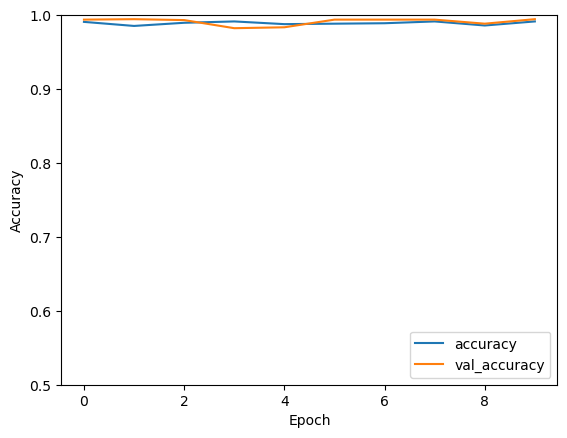

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(SampleR, SampleOutput, verbose=2)

In [ ]:
# 모델 저장하기
# model.save('rock classification')


1/1 [==============================] - 0s 94ms/step


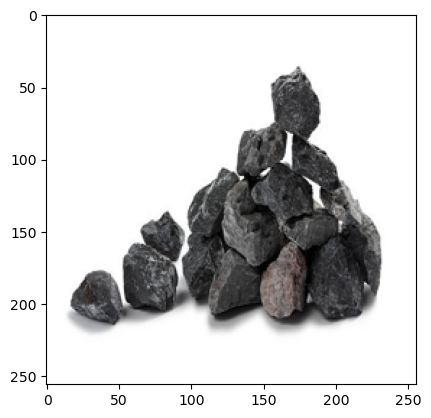

In [ ]:
#print(종속[0:100])
plt.imshow(독립[2])
#image_arrayR = image_array.reshape(3136, 784)
#print(gray_image_array)
